[*********************100%***********************]  3 of 3 completed
<ipython-input-2-9d98c43297e0>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


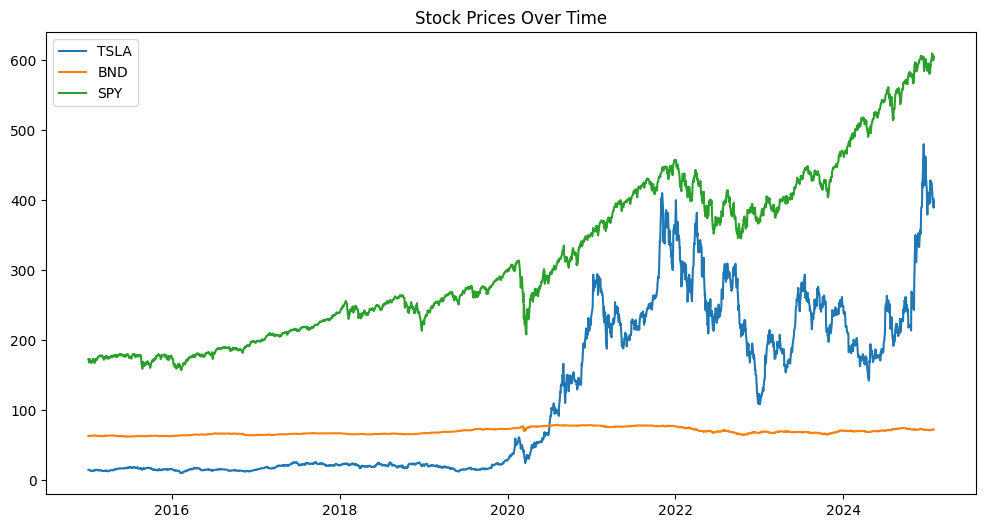

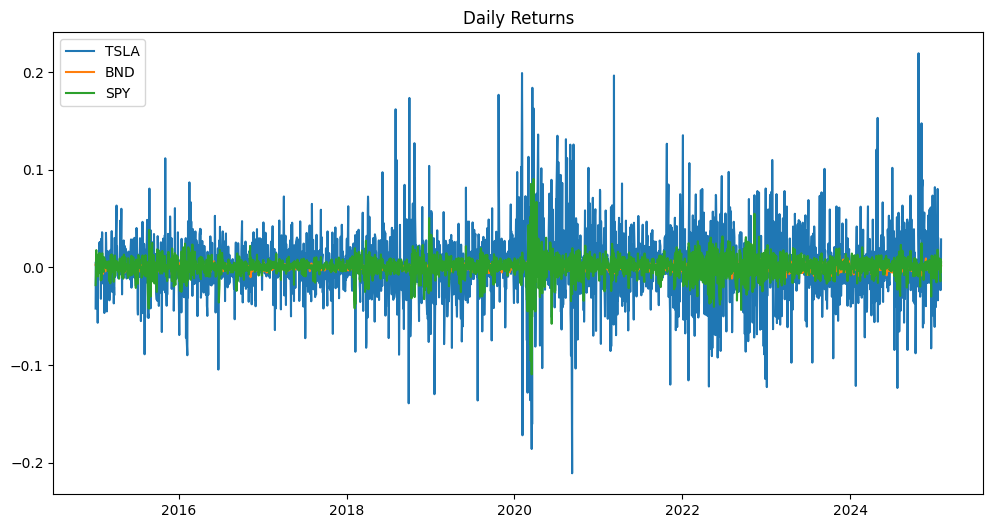

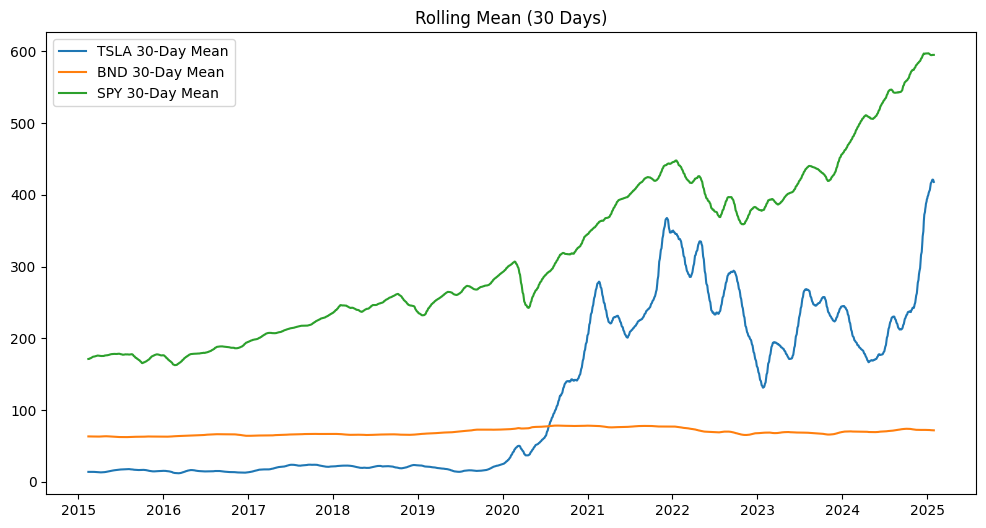

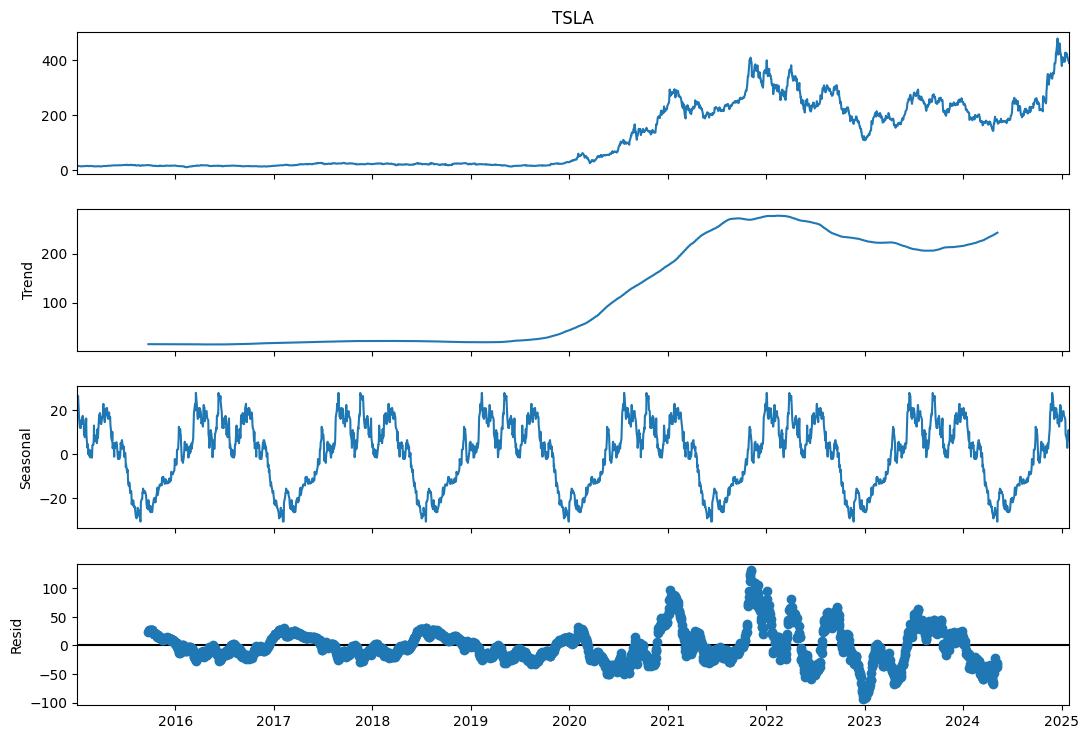

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31')
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed
<ipython-input-3-cb4b0df9f2e7>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


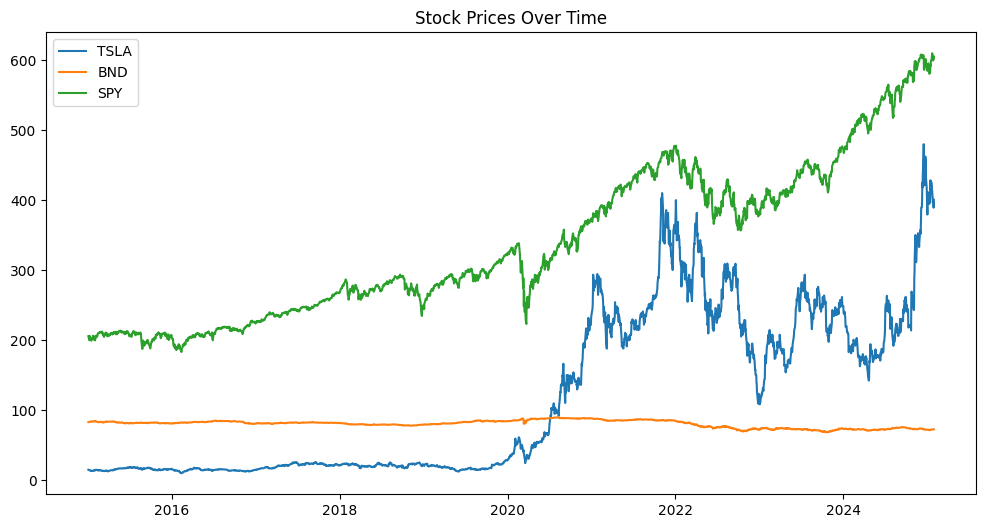

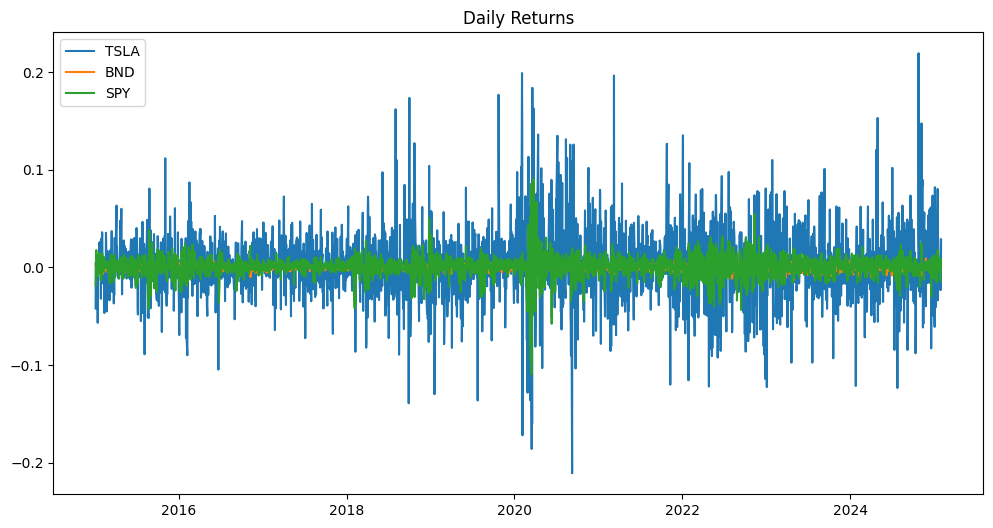

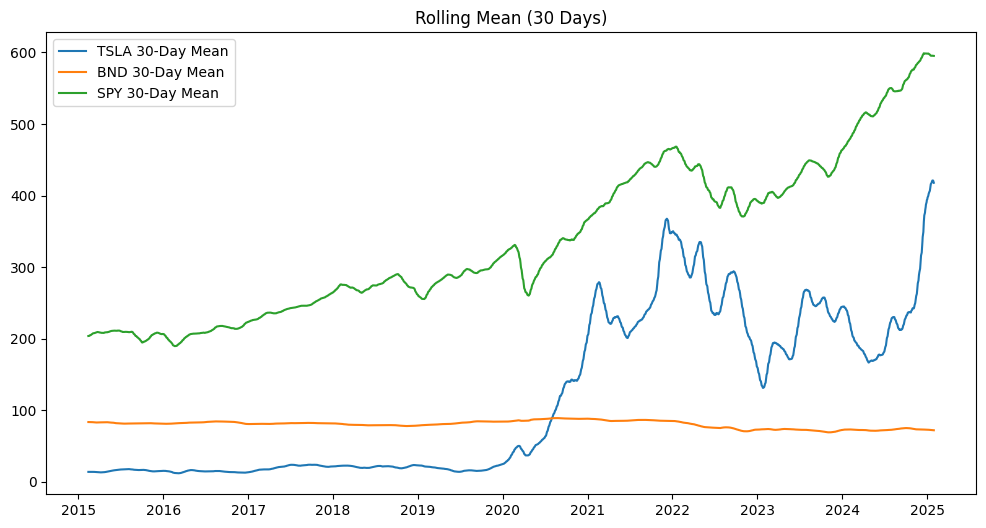

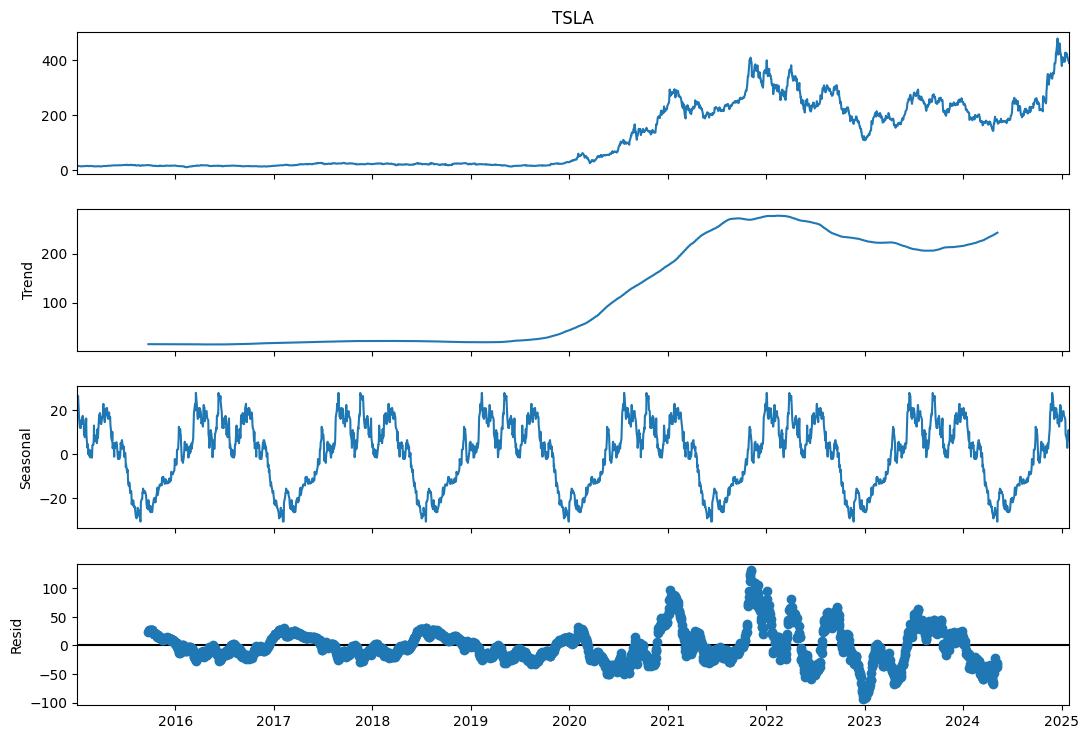

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338


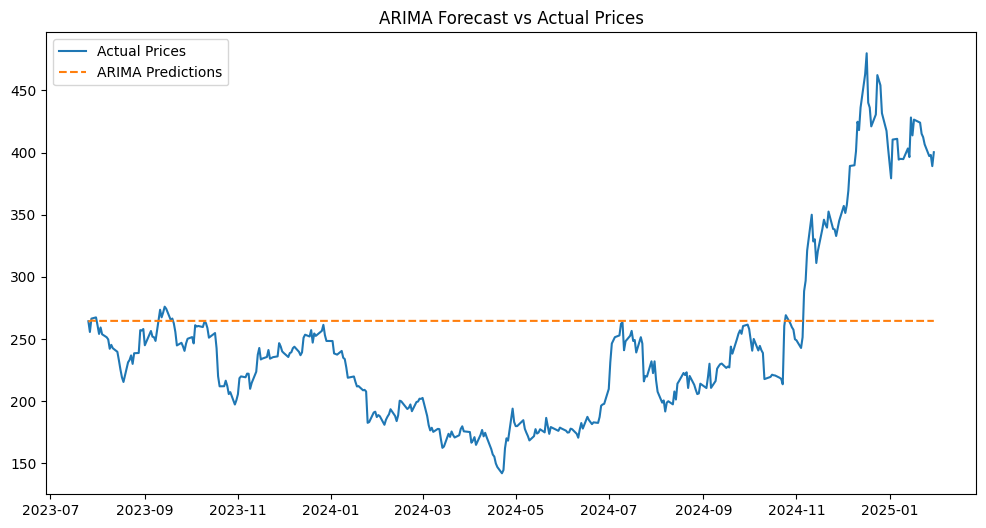

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae = mean_absolute_error(test, test_predictions)
rmse = sqrt(mean_squared_error(test, test_predictions))
print(f'ARIMA Model - MAE: {mae}, RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, test_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.legend()
plt.title("ARIMA Forecast vs Actual Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed

Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64



<ipython-input-4-2293287a632d>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


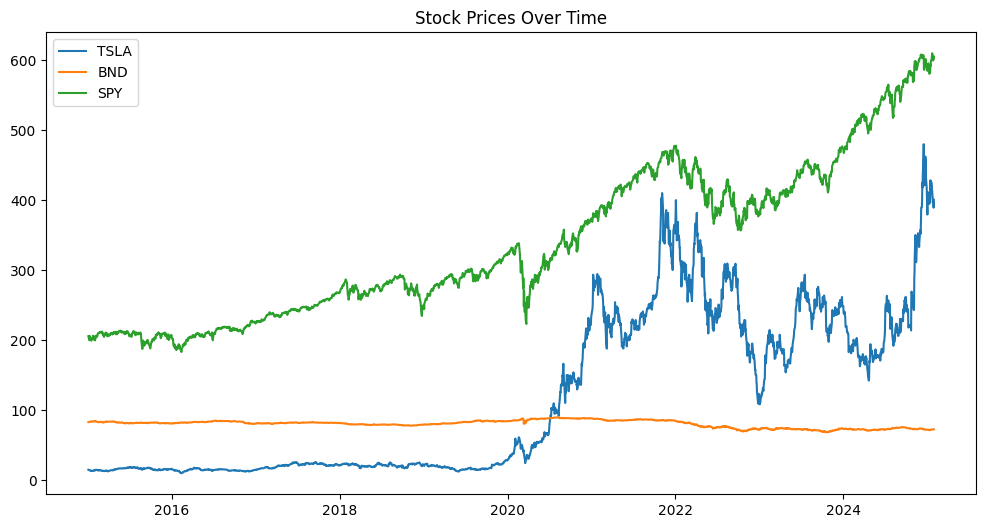

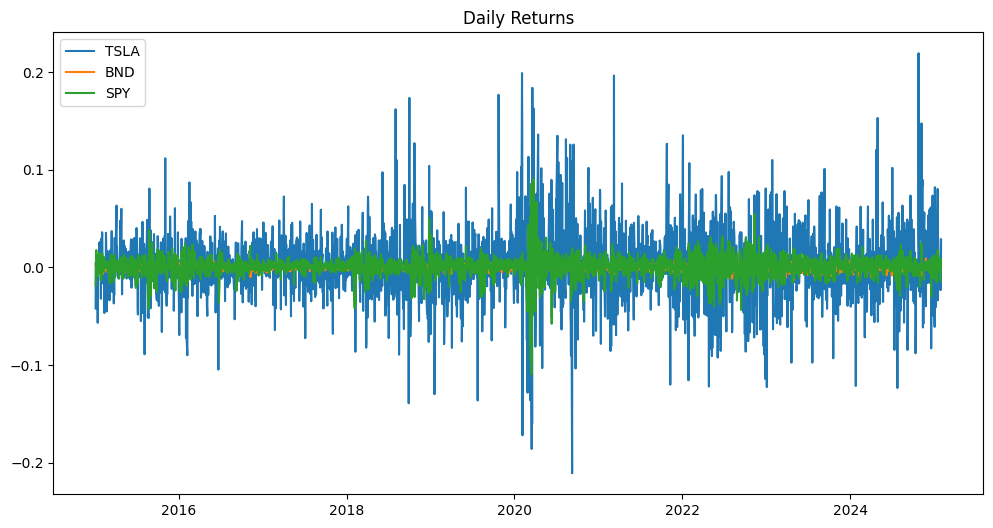

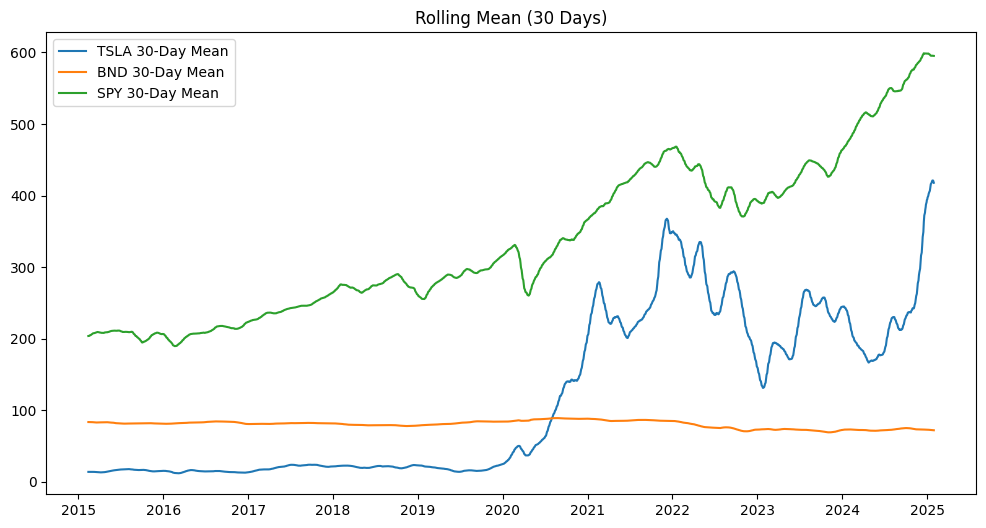

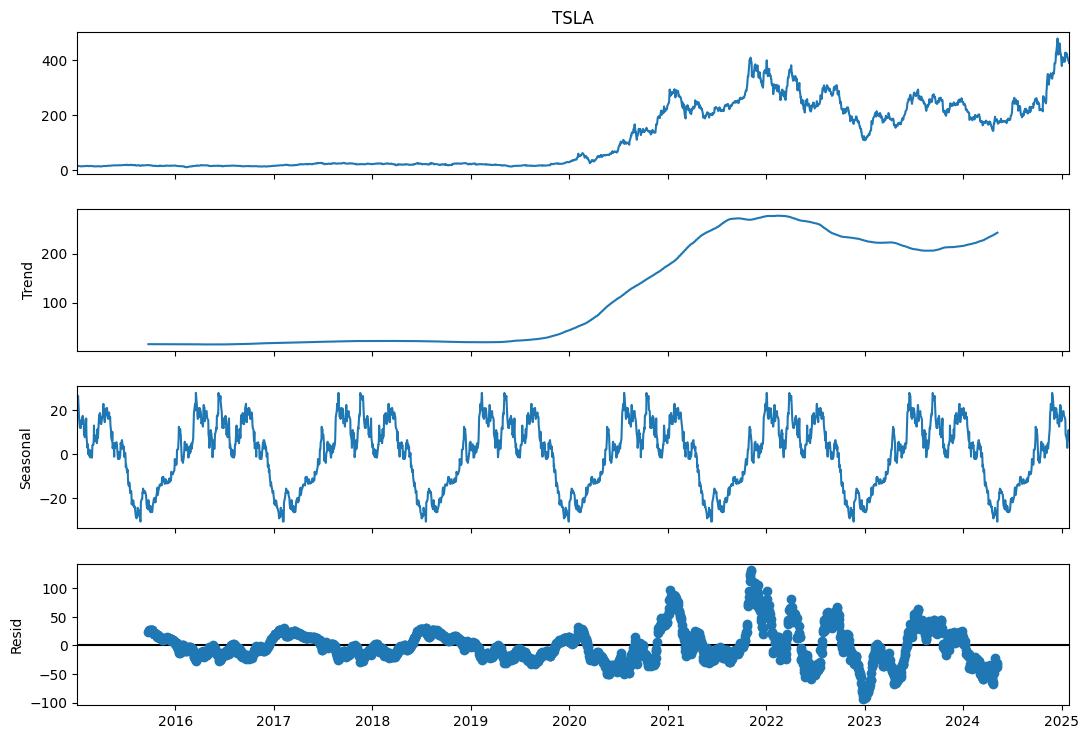

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA Model - MAE: 68.9577341232846, RMSE: 78.58273099952477


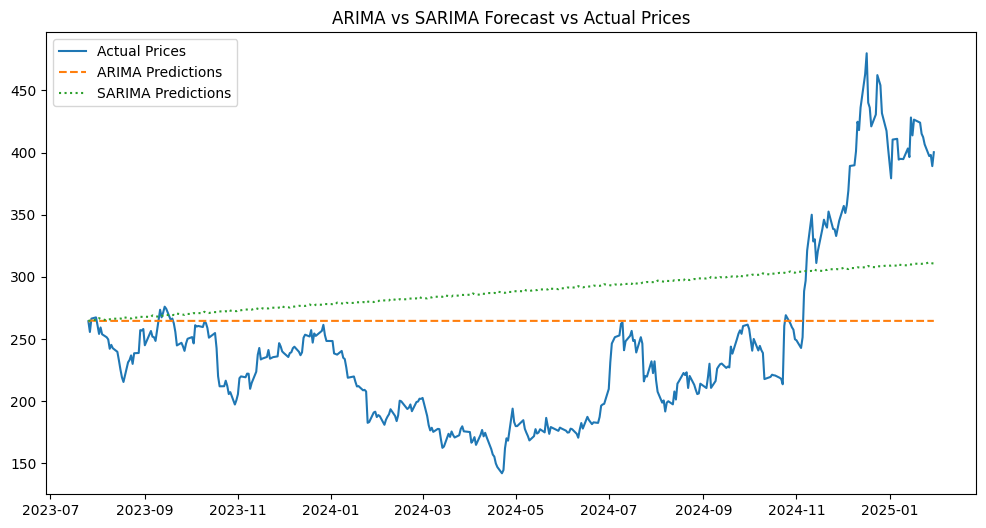

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions_arima = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae_arima = mean_absolute_error(test, test_predictions_arima)
rmse_arima = sqrt(mean_squared_error(test, test_predictions_arima))
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')

# SARIMA Model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

test_predictions_sarima = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
mae_sarima = mean_absolute_error(test, test_predictions_sarima)
rmse_sarima = sqrt(mean_squared_error(test, test_predictions_sarima))
print(f'SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}')

# Plot actual vs predicted values for ARIMA and SARIMA
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, test_predictions_arima, label='ARIMA Predictions', linestyle='dashed')
plt.plot(test.index, test_predictions_sarima, label='SARIMA Predictions', linestyle='dotted')
plt.legend()
plt.title("ARIMA vs SARIMA Forecast vs Actual Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed
<ipython-input-5-f4ce7964e77d>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


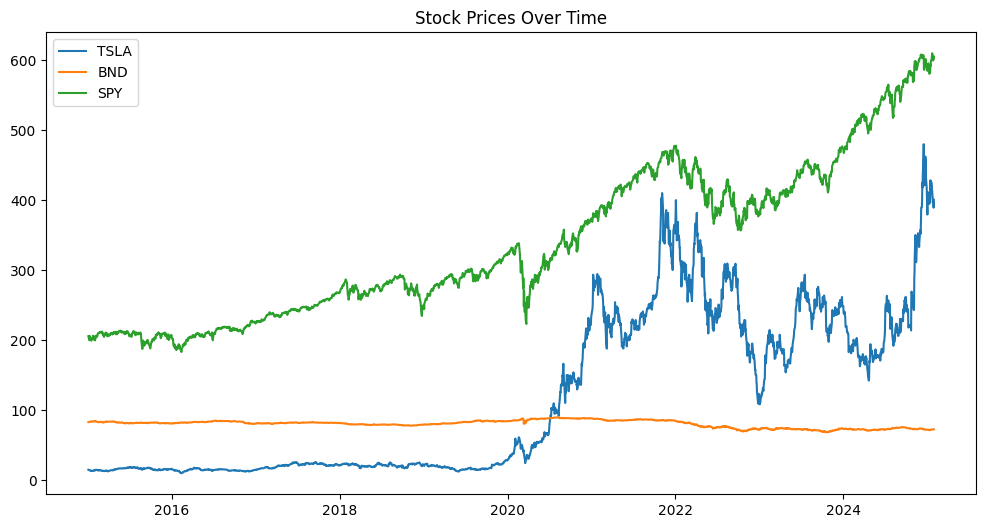

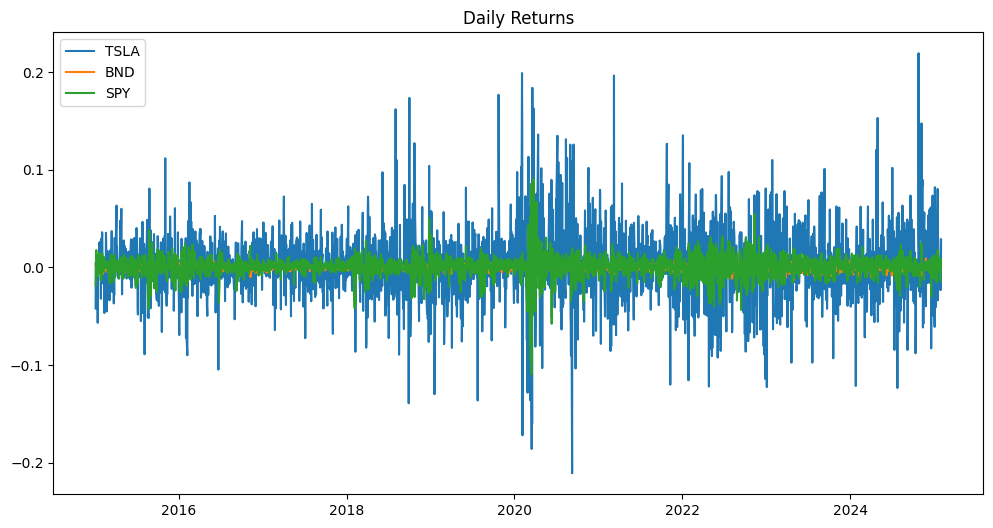

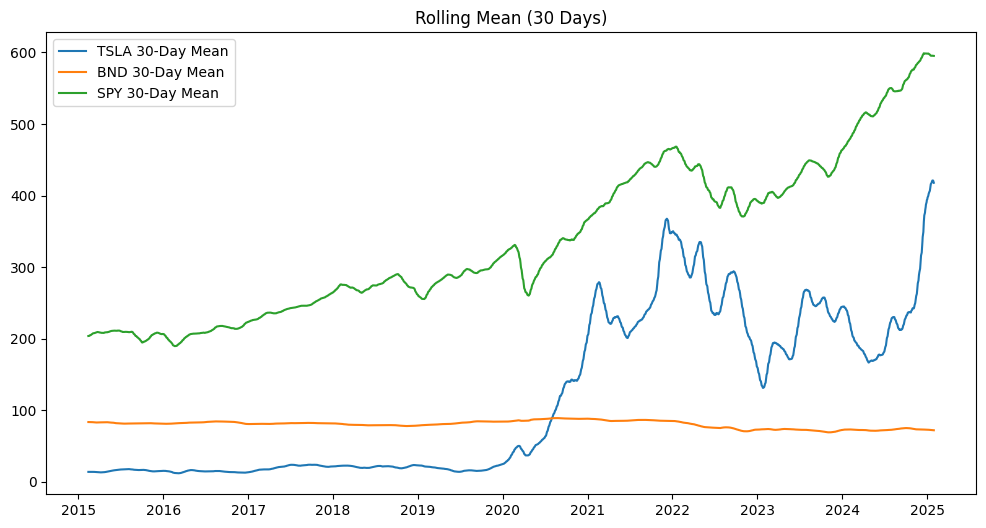

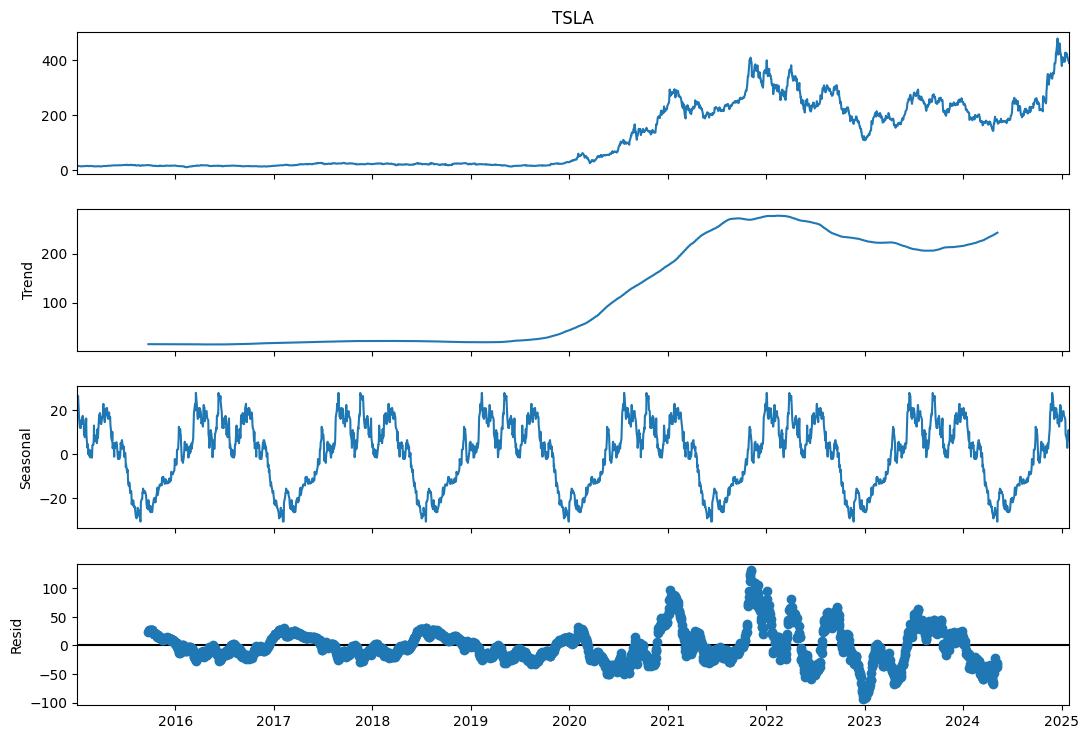

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338
SARIMA Model - MAE: 68.9577341232846, RMSE: 78.58273099952477
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0406
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.6623e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0810e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8419e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.4948e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7203e-04
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.2419e-04
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3404e-04
Epoch 10/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.4325e-04
Epoch 11/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8311e-04
Epoch 12/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5229e-04
Epoch 13/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7378e-04
Epoch 14/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1415e-04
Epoch 15/20
134/134 

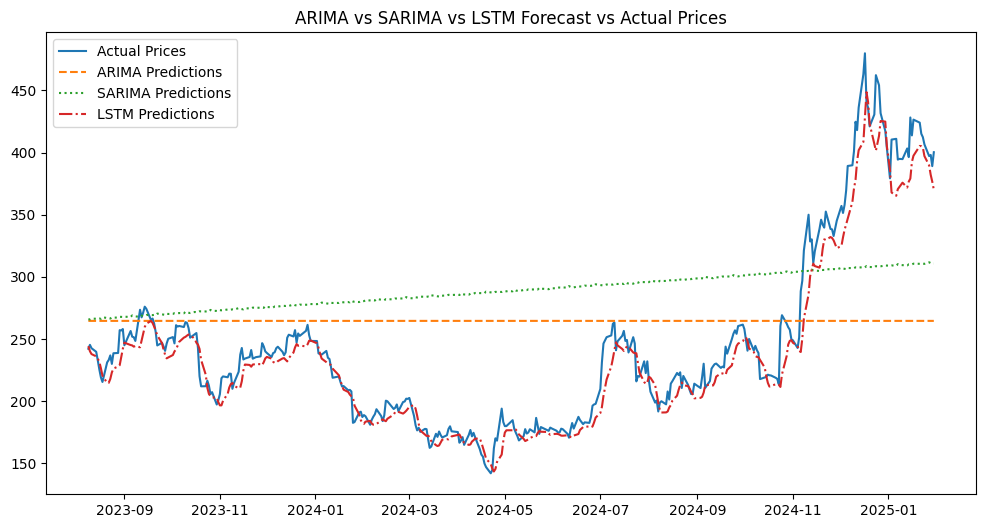

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions_arima = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae_arima = mean_absolute_error(test, test_predictions_arima)
rmse_arima = sqrt(mean_squared_error(test, test_predictions_arima))
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')

# SARIMA Model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

test_predictions_sarima = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
mae_sarima = mean_absolute_error(test, test_predictions_sarima)
rmse_sarima = sqrt(mean_squared_error(test, test_predictions_sarima))
print(f'SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}')

# LSTM Model Preparation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Test LSTM
scaled_test = scaler.transform(test.values.reshape(-1, 1))
X_test, y_test = create_sequences(scaled_test, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate LSTM Model
mae_lstm = mean_absolute_error(test[seq_length:], lstm_predictions)
rmse_lstm = sqrt(mean_squared_error(test[seq_length:], lstm_predictions))
print(f'LSTM Model - MAE: {mae_lstm}, RMSE: {rmse_lstm}')

# Plot ARIMA, SARIMA, and LSTM Forecasts
plt.figure(figsize=(12,6))
plt.plot(test.index[seq_length:], test[seq_length:], label='Actual Prices')
plt.plot(test.index[seq_length:], test_predictions_arima[seq_length:], label='ARIMA Predictions', linestyle='dashed')
plt.plot(test.index[seq_length:], test_predictions_sarima[seq_length:], label='SARIMA Predictions', linestyle='dotted')
plt.plot(test.index[seq_length:], lstm_predictions, label='LSTM Predictions', linestyle='dashdot')
plt.legend()
plt.title("ARIMA vs SARIMA vs LSTM Forecast vs Actual Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed
<ipython-input-6-a0512ece245f>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


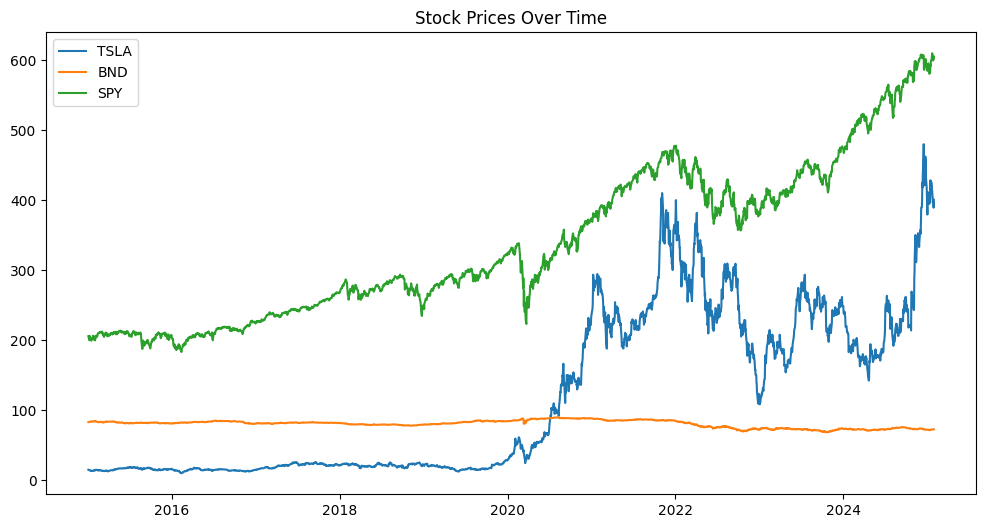

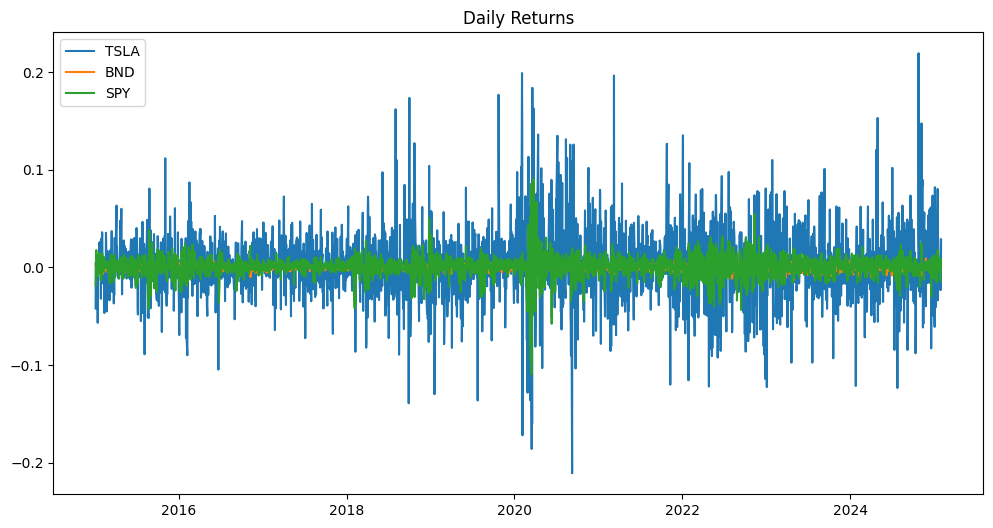

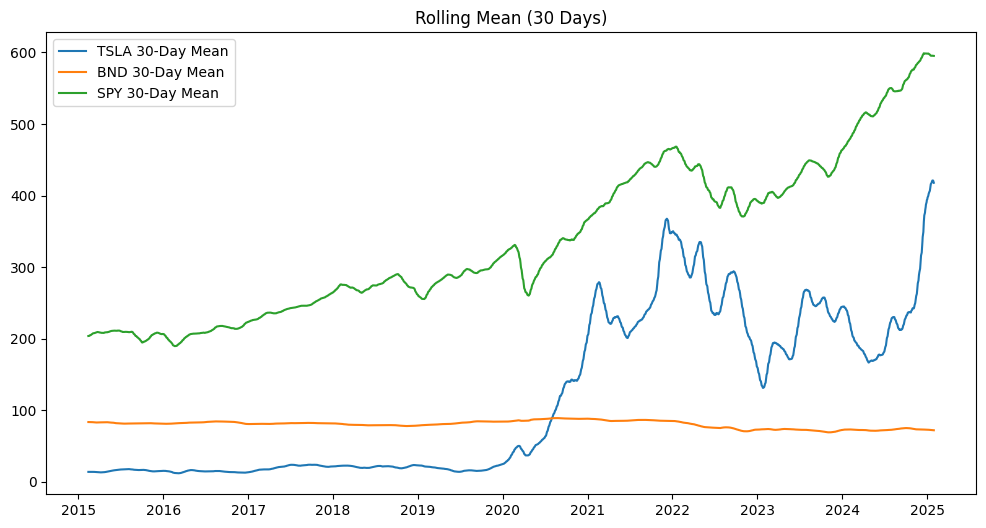

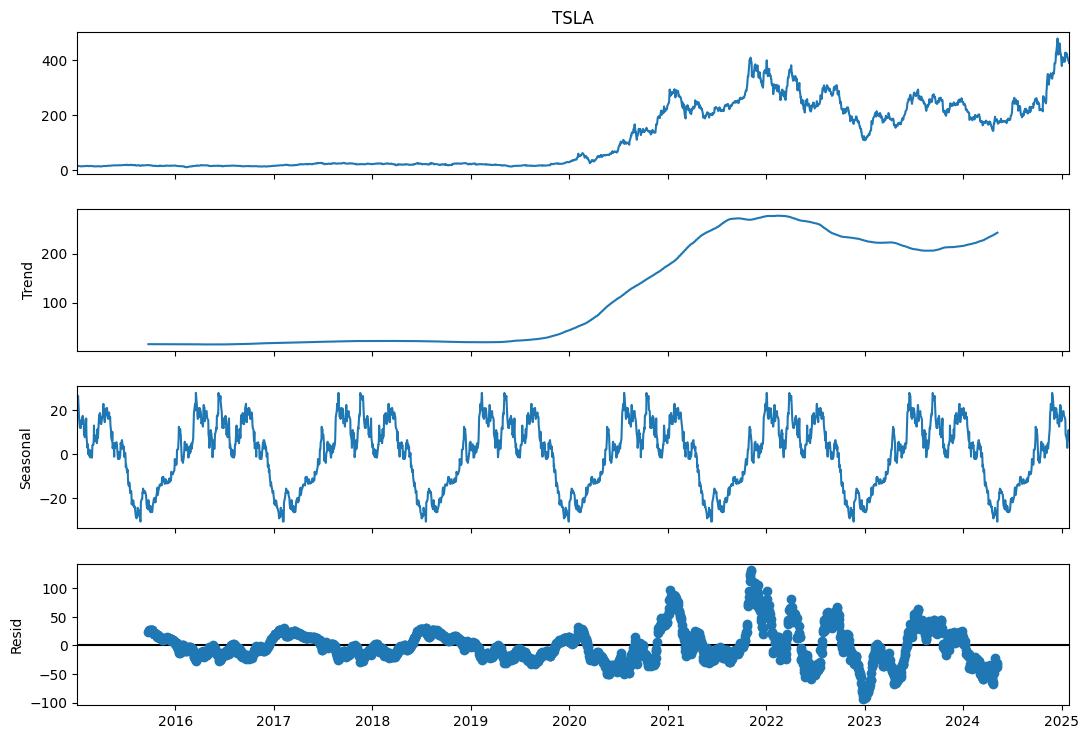

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338
SARIMA Model - MAE: 68.9577341232846, RMSE: 78.58273099952477
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0273
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7295e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.9627e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.6429e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.8133e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5768e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0726e-04
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5827e-04
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7486e-04
Epoch 10/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3409e-04
Epoch 11/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0247e-04
Epoch 12/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1303e-04
Epoch 13/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6912e-04
Epoch 14/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2469e-04
Epoch 15/20
134/

<ipython-input-6-a0512ece245f>:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

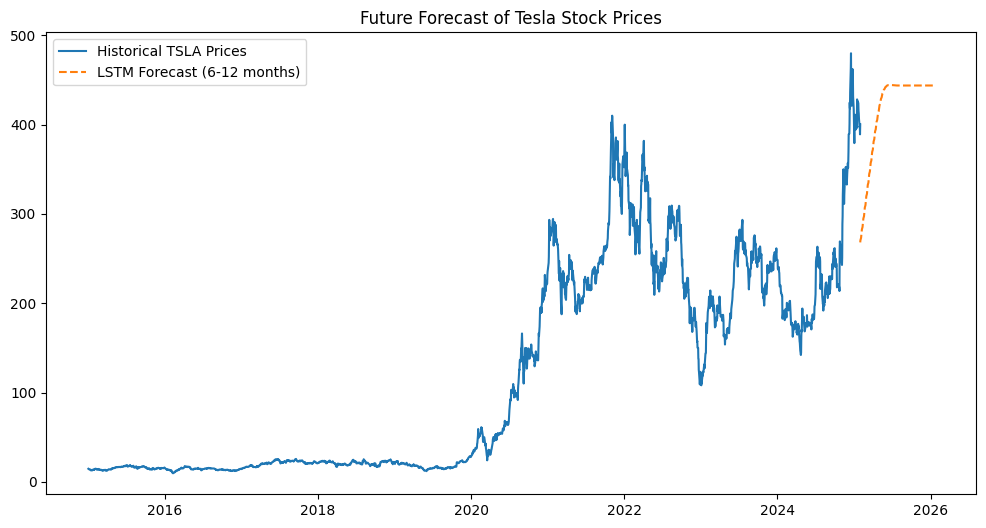

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions_arima = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae_arima = mean_absolute_error(test, test_predictions_arima)
rmse_arima = sqrt(mean_squared_error(test, test_predictions_arima))
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')

# SARIMA Model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

test_predictions_sarima = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
mae_sarima = mean_absolute_error(test, test_predictions_sarima)
rmse_sarima = sqrt(mean_squared_error(test, test_predictions_sarima))
print(f'SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}')

# LSTM Model Preparation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Future Forecasting (6-12 months) using LSTM
future_steps = 252  # ~1 year of trading days
last_sequence = scaled_train[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(future_steps):
    pred = lstm_model.predict(last_sequence)[0]
    future_predictions.append(pred)
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot Future Predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps, freq='B')
plt.figure(figsize=(12,6))
plt.plot(data.index, data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, future_predictions, label='LSTM Forecast (6-12 months)', linestyle='dashed')
plt.legend()
plt.title("Future Forecast of Tesla Stock Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed
<ipython-input-7-a0512ece245f>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


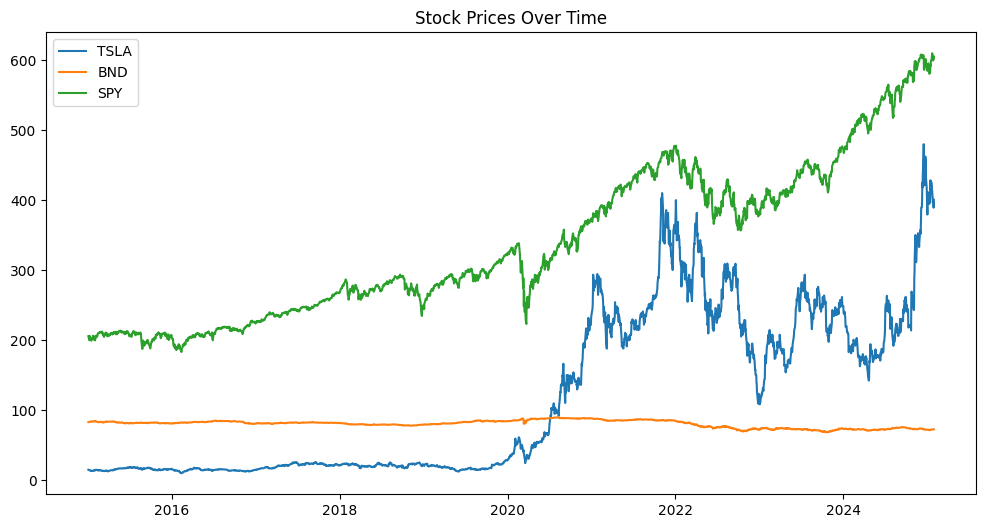

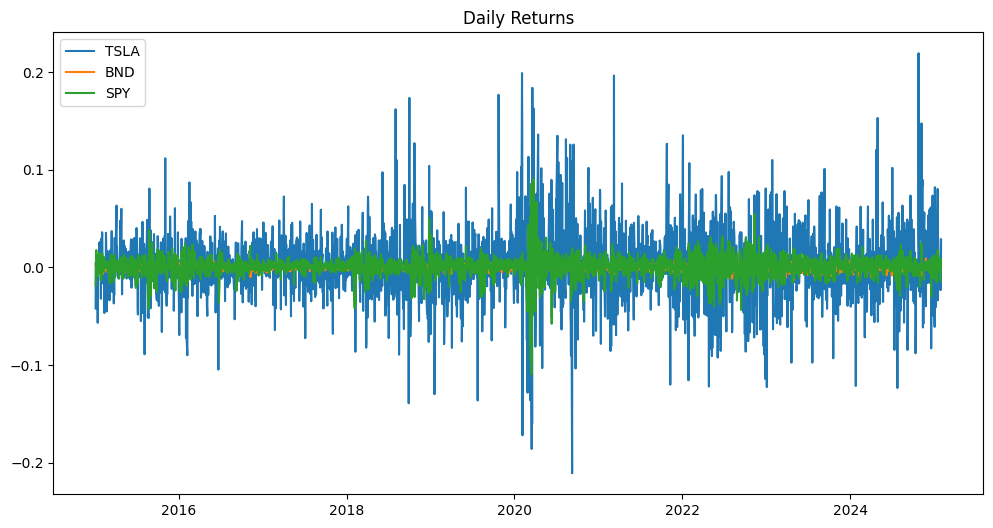

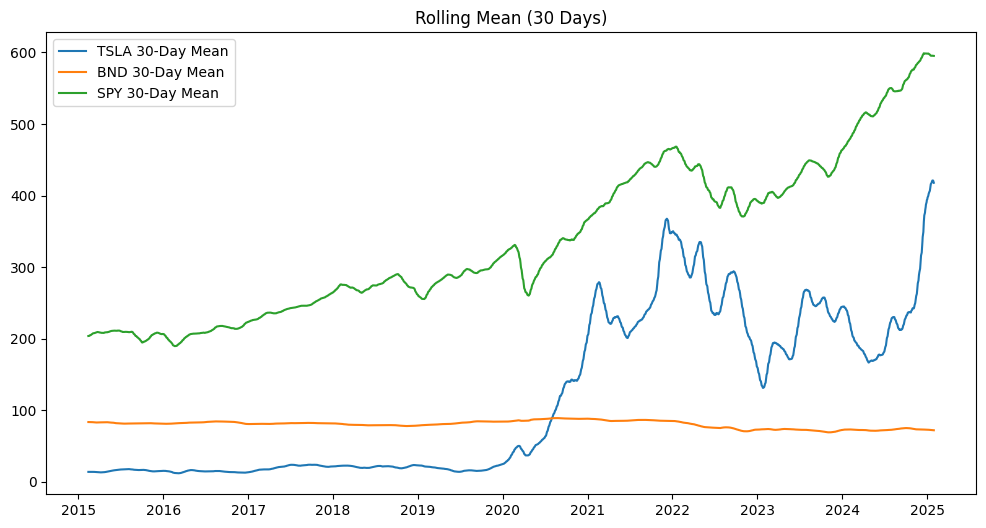

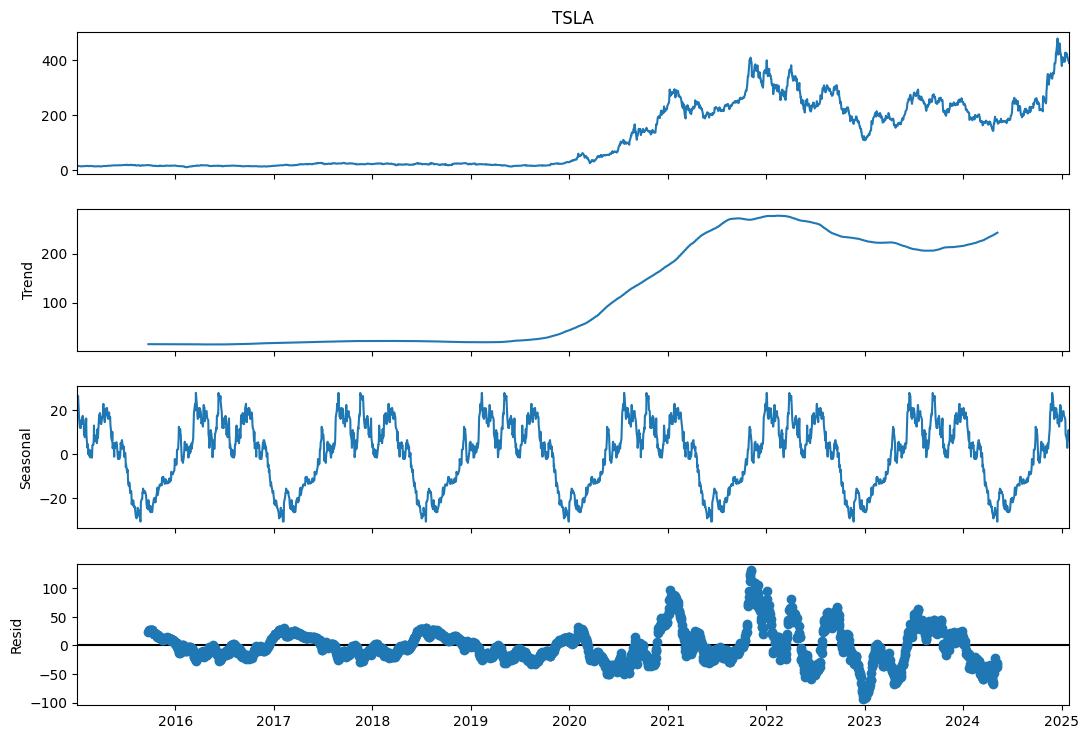

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338
SARIMA Model - MAE: 68.9577341232846, RMSE: 78.58273099952477
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0385
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4842e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.2032e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7802e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7146e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5939e-04
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6503e-04
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.4221e-04
Epoch 10/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0995e-04
Epoch 11/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7542e-04
Epoch 12/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4050e-04
Epoch 13/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4231e-04
Epoch 14/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1962e-04
Epoch 15/20
134/134 

<ipython-input-7-a0512ece245f>:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

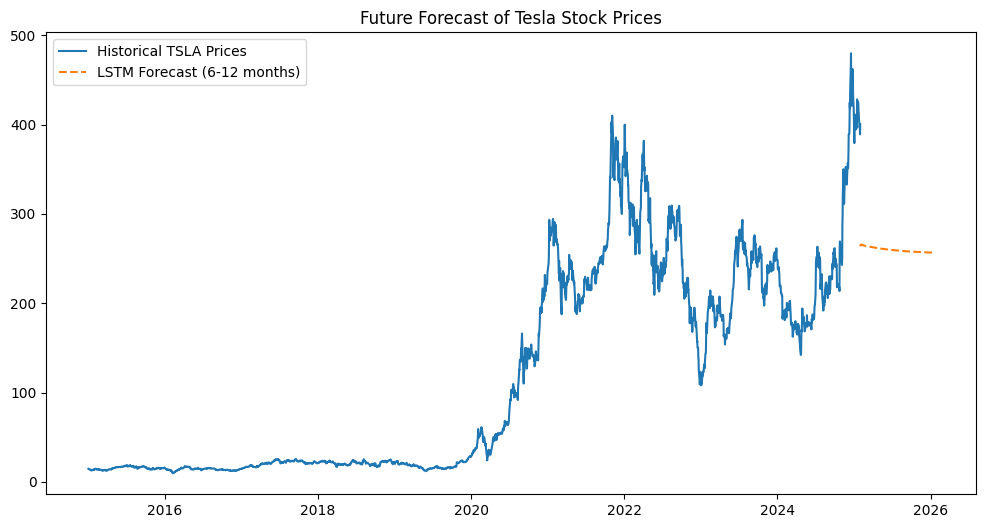

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions_arima = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae_arima = mean_absolute_error(test, test_predictions_arima)
rmse_arima = sqrt(mean_squared_error(test, test_predictions_arima))
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')

# SARIMA Model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

test_predictions_sarima = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
mae_sarima = mean_absolute_error(test, test_predictions_sarima)
rmse_sarima = sqrt(mean_squared_error(test, test_predictions_sarima))
print(f'SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}')

# LSTM Model Preparation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Future Forecasting (6-12 months) using LSTM
future_steps = 252  # ~1 year of trading days
last_sequence = scaled_train[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(future_steps):
    pred = lstm_model.predict(last_sequence)[0]
    future_predictions.append(pred)
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot Future Predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps, freq='B')
plt.figure(figsize=(12,6))
plt.plot(data.index, data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, future_predictions, label='LSTM Forecast (6-12 months)', linestyle='dashed')
plt.legend()
plt.title("Future Forecast of Tesla Stock Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed

Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64



<ipython-input-8-a0512ece245f>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


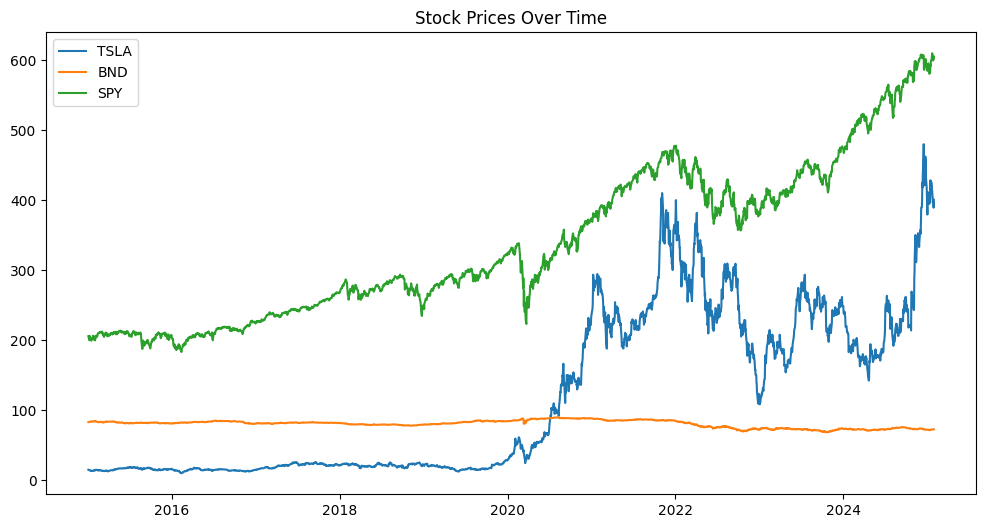

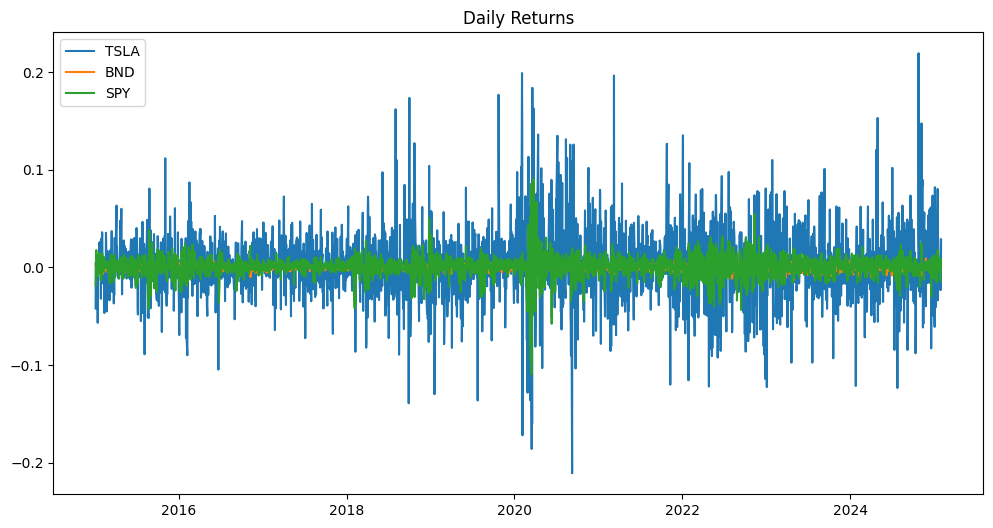

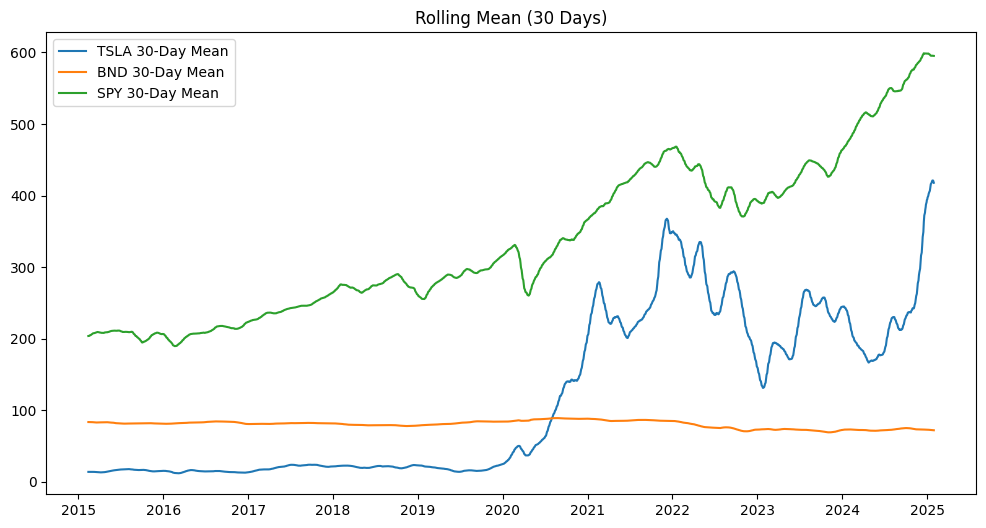

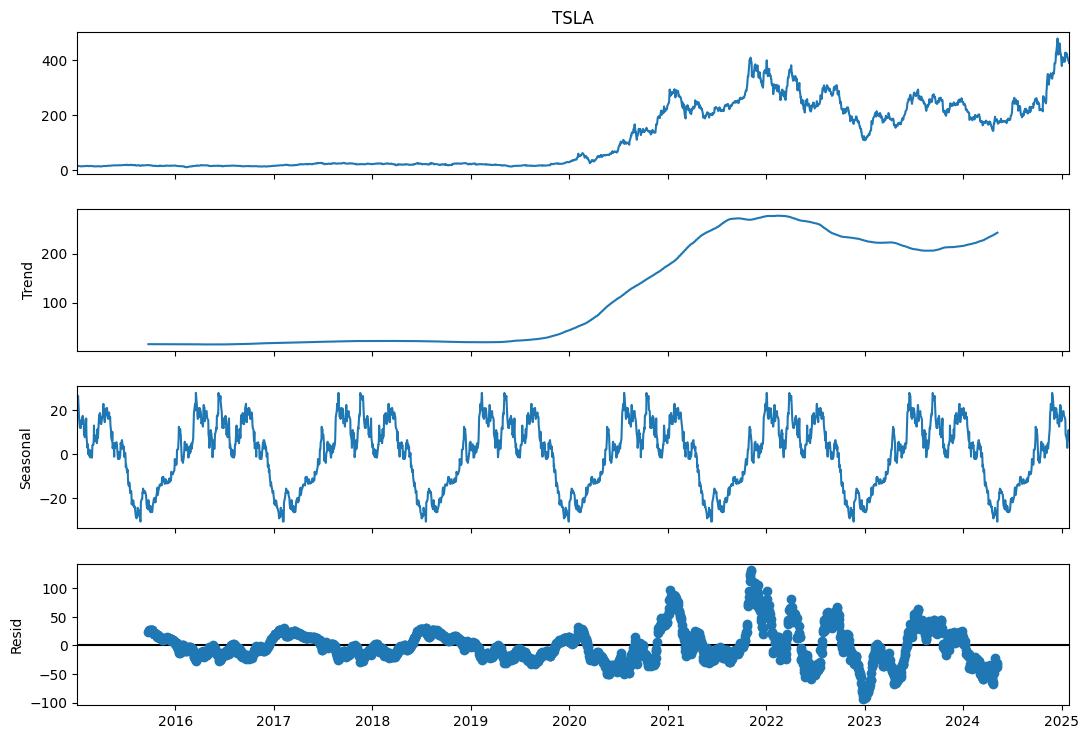

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 58.556725090602505, RMSE: 72.78880649877338
SARIMA Model - MAE: 68.9577341232846, RMSE: 78.58273099952477
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0427
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7376e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5531e-04
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5797e-04
Epoch 10/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1196e-04
Epoch 11/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9811e-04
Epoch 12/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9958e-04
Epoch 13/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4442e-04
Epoch 14/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.8668e-04
Epoch 15/20
134/134 ━━━━━━━━━━━━━━━━

<ipython-input-8-a0512ece245f>:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

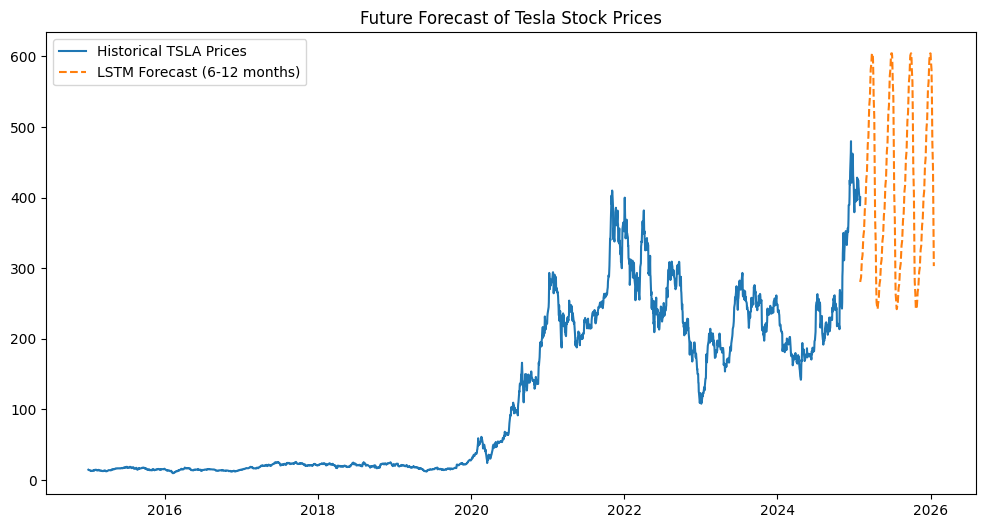

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

# Daily Returns
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling Mean & Standard Deviation (Volatility)
window = 30
rolling_means = data.rolling(window=window).mean()
rolling_std = data.rolling(window=window).std()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f'{ticker} {window}-Day Mean')
plt.title("Rolling Mean (30 Days)")
plt.legend()
plt.show()

# Seasonal Decomposition for Tesla (TSLA)
decomposition = seasonal_decompose(data['TSLA'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Split data into training and test sets
train_size = int(len(data['TSLA']) * 0.85)
train, test = data['TSLA'][:train_size], data['TSLA'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

test_predictions_arima = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
mae_arima = mean_absolute_error(test, test_predictions_arima)
rmse_arima = sqrt(mean_squared_error(test, test_predictions_arima))
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}')

# SARIMA Model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

test_predictions_sarima = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
mae_sarima = mean_absolute_error(test, test_predictions_sarima)
rmse_sarima = sqrt(mean_squared_error(test, test_predictions_sarima))
print(f'SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}')

# LSTM Model Preparation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Future Forecasting (6-12 months) using LSTM
future_steps = 252  # ~1 year of trading days
last_sequence = scaled_train[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(future_steps):
    pred = lstm_model.predict(last_sequence)[0]
    future_predictions.append(pred)
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot Future Predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps, freq='B')
plt.figure(figsize=(12,6))
plt.plot(data.index, data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, future_predictions, label='LSTM Forecast (6-12 months)', linestyle='dashed')
plt.legend()
plt.title("Future Forecast of Tesla Stock Prices")
plt.show()

# Save processed data
data.to_csv("processed_stock_data.csv")


[*********************100%***********************]  3 of 3 completed
<ipython-input-1-6c548e033ac1>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Optimized Portfolio Weights:
TSLA: 0.00%
BND: 64.17%
SPY: 35.83%

Optimized Portfolio Performance:
Expected Return: 25.53%
Volatility: 27.64%
Sharpe Ratio: 0.92


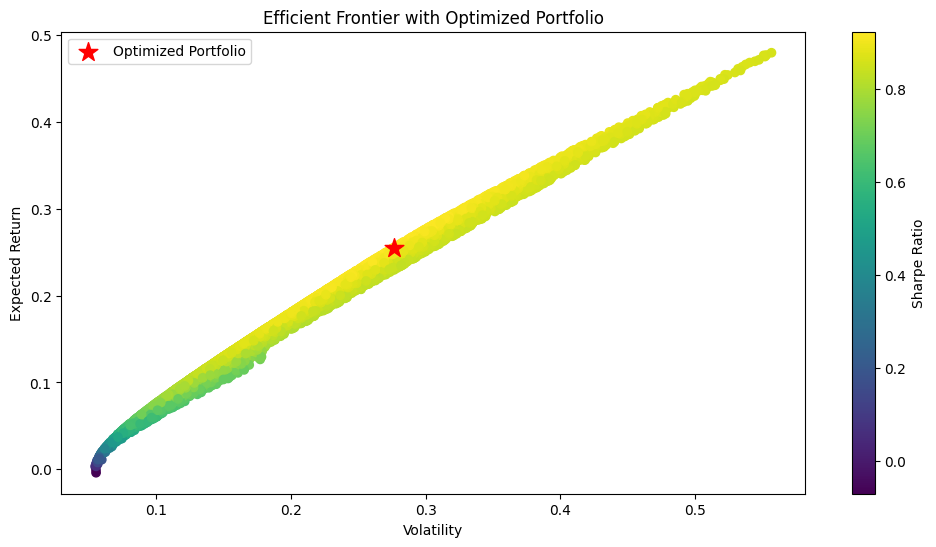

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import scipy.optimize as sco

# Fetch historical data for TSLA, BND, SPY (Jan 1, 2015 - Jan 31, 2025)
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2025-01-31', auto_adjust=False)
data = data['Close']  # Use Close prices since Adj Close is missing

data.head()

# Data Cleaning: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Compute Daily Returns
daily_returns = data.pct_change().dropna()

# Compute Expected Annual Returns and Covariance Matrix
expected_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Portfolio Optimization - Sharpe Ratio Maximization
def portfolio_performance(weights, expected_returns, cov_matrix):
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = returns / volatility
    return returns, volatility, sharpe_ratio

def neg_sharpe_ratio(weights, expected_returns, cov_matrix):
    return -portfolio_performance(weights, expected_returns, cov_matrix)[2]

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))
initial_weights = np.array([1/len(tickers)] * len(tickers))

optimized_result = sco.minimize(neg_sharpe_ratio, initial_weights, args=(expected_returns, cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

optimized_weights = optimized_result.x
opt_return, opt_volatility, opt_sharpe = portfolio_performance(optimized_weights, expected_returns, cov_matrix)

# Display Optimized Portfolio Allocation
print("Optimized Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimized_weights[i]:.2%}")

print(f"\nOptimized Portfolio Performance:")
print(f"Expected Return: {opt_return:.2%}")
print(f"Volatility: {opt_volatility:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")

# Visualization - Efficient Frontier
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    all_weights[i,:] = weights
    ret_arr[i], vol_arr[i], sharpe_arr[i] = portfolio_performance(weights, expected_returns, cov_matrix)

plt.figure(figsize=(12,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.scatter(opt_volatility, opt_return, c='red', marker='*', s=200, label='Optimized Portfolio')
plt.legend()
plt.title('Efficient Frontier with Optimized Portfolio')
plt.show()

# Save Processed Data
data.to_csv("processed_stock_data.csv")
